In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("C:/Abhinav/Test/DL/ecg.csv")

In [3]:
data.shape

(333, 21)

In [4]:
data.head()

,age,sex,smoke,years,ldl,chp,height,weight,fh,active,...,ihd,hr,dm,bpsys,bpdias,htn,ivsd,ecgpatt,qwave,target
0,65,0,0,0,69.0,4,168,111.0,1,0,...,1,98,1,120,80,1,0,4,0,0
1,54,1,0,0,117.0,2,145,81.0,0,0,...,0,85,0,130,80,0,0,4,0,0
2,61,0,1,45,86.2,2,160,72.0,0,0,...,0,63,1,150,70,1,0,2,0,1
3,57,0,0,0,76.0,2,176,78.0,1,0,...,1,74,1,120,70,0,0,3,0,1
4,62,1,0,0,160.0,3,154,61.0,0,0,...,0,89,1,110,70,0,0,1,0,1


In [5]:
data.describe()

,age,sex,smoke,years,ldl,chp,height,weight,fh,active,...,ihd,hr,dm,bpsys,bpdias,htn,ivsd,ecgpatt,qwave,target
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,...,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,55.117117,0.534535,0.195195,4.798799,112.926246,2.885886,162.102102,82.157357,0.237237,0.369369,...,0.255255,83.882883,0.231231,123.618619,74.879880,0.516517,0.282282,3.315315,0.078078,0.354354
std,14.159210,0.499557,0.396947,11.249835,37.972983,1.032110,11.295127,15.392197,0.426029,0.483360,...,0.436661,14.633107,0.422254,21.341639,12.681834,0.500479,0.450787,0.981596,0.268698,0.479037
min,20.000000,0.000000,0.000000,0.000000,26.000000,1.000000,128.000000,41.000000,0.000000,0.000000,...,0.000000,40.000000,0.000000,80.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,44.000000,0.000000,0.000000,0.000000,86.200000,2.000000,153.000000,72.000000,0.000000,0.000000,...,0.000000,74.000000,0.000000,110.000000,70.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,57.000000,1.000000,0.000000,0.000000,110.000000,3.000000,162.000000,81.000000,0.000000,0.000000,...,0.000000,84.000000,0.000000,120.000000,70.000000,1.000000,0.000000,4.000000,0.000000,0.000000
75%,67.000000,1.000000,0.000000,0.000000,137.000000,4.000000,171.000000,90.300000,0.000000,1.000000,...,1.000000,91.000000,0.000000,135.000000,80.000000,1.000000,1.000000,4.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,50.000000,260.000000,4.000000,192.000000,134.000000,1.000000,1.000000,...,1.000000,140.000000,1.000000,220.000000,140.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [6]:
data.tail()

,age,sex,smoke,years,ldl,chp,height,weight,fh,active,...,ihd,hr,dm,bpsys,bpdias,htn,ivsd,ecgpatt,qwave,target
328,46,1,0,0,111.0,4,143,66.5,0,0,...,0,107,0,150,90,1,1,1,0,0
329,42,0,1,17,164.0,2,164,79.0,1,1,...,0,112,0,110,70,0,0,1,0,0
330,51,0,0,0,116.0,4,180,92.0,0,1,...,0,81,0,105,80,1,0,4,0,0
331,45,1,0,0,102.0,3,166,79.0,0,0,...,0,96,0,110,70,0,0,4,0,0
332,68,1,0,0,92.0,2,165,80.0,1,0,...,0,68,0,115,75,1,0,4,0,0


In [7]:
missing_data = data.isnull().sum()
total_percentage = (missing_data.sum()/data.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage, 2)}%')

The total percentage of missing data is 0.0%


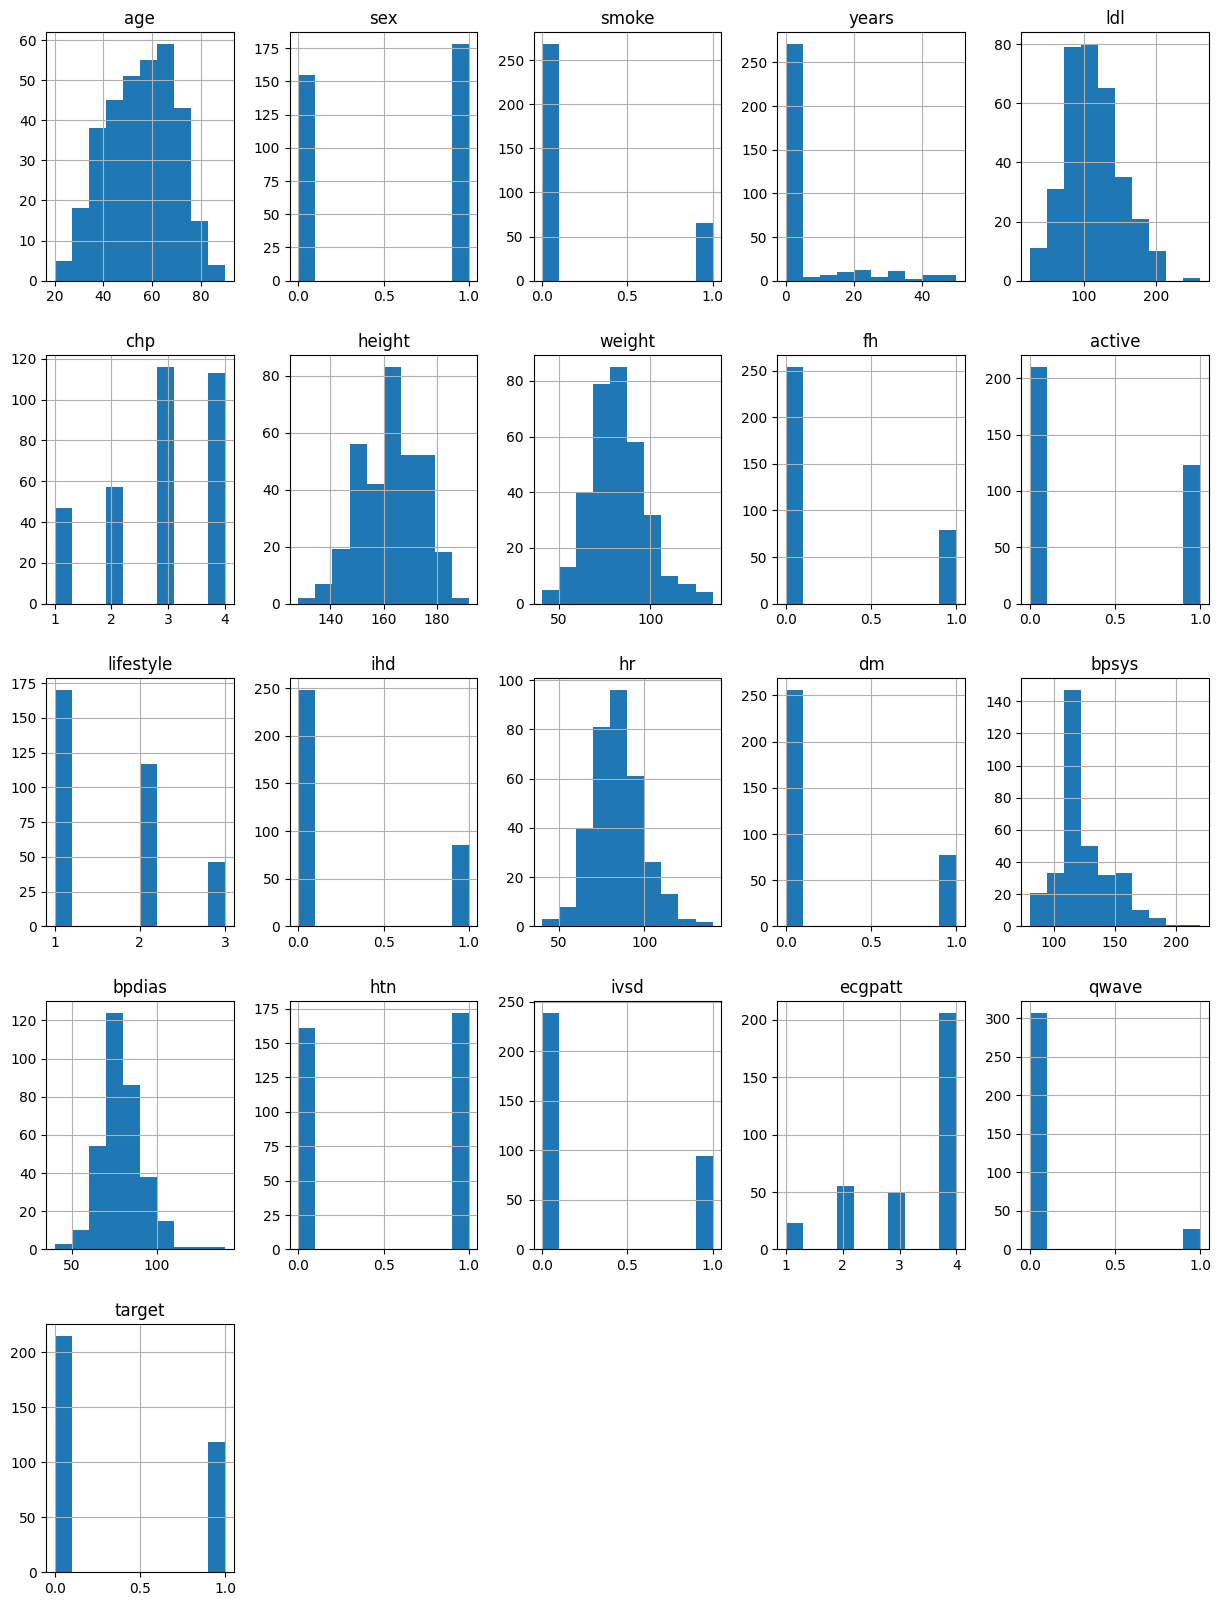

In [8]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

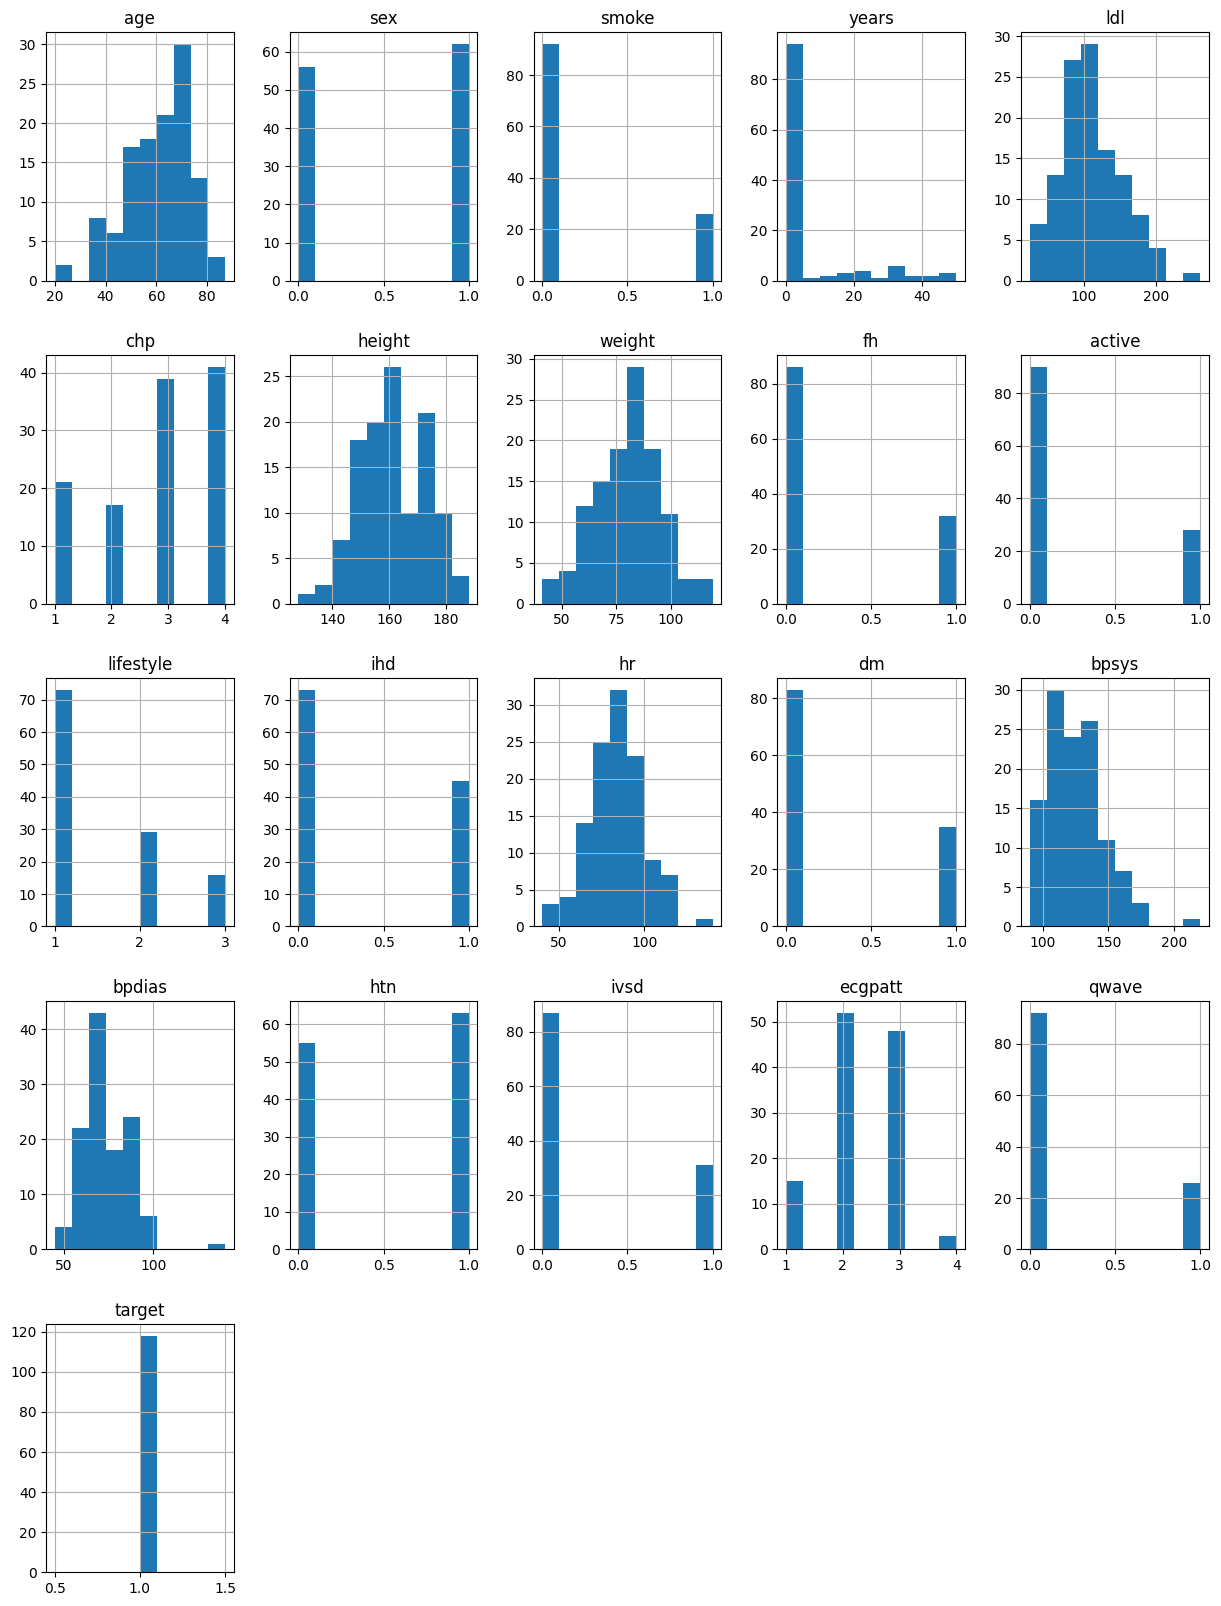

In [9]:
# plot a histogram to see the distribution of the data for heart disease cases
dataset_copy = data[data['target']==1]
columns = data.columns[:21]
fig = plt.figure(figsize=(15,20))
ax = fig.gca()
dataset_copy.hist(ax = ax)
plt.show()

**Case Counts**

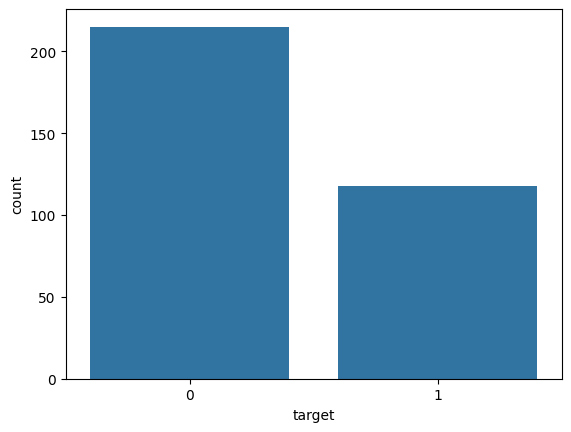

In [10]:
sns.countplot(x='target', data=data)
plt.show()

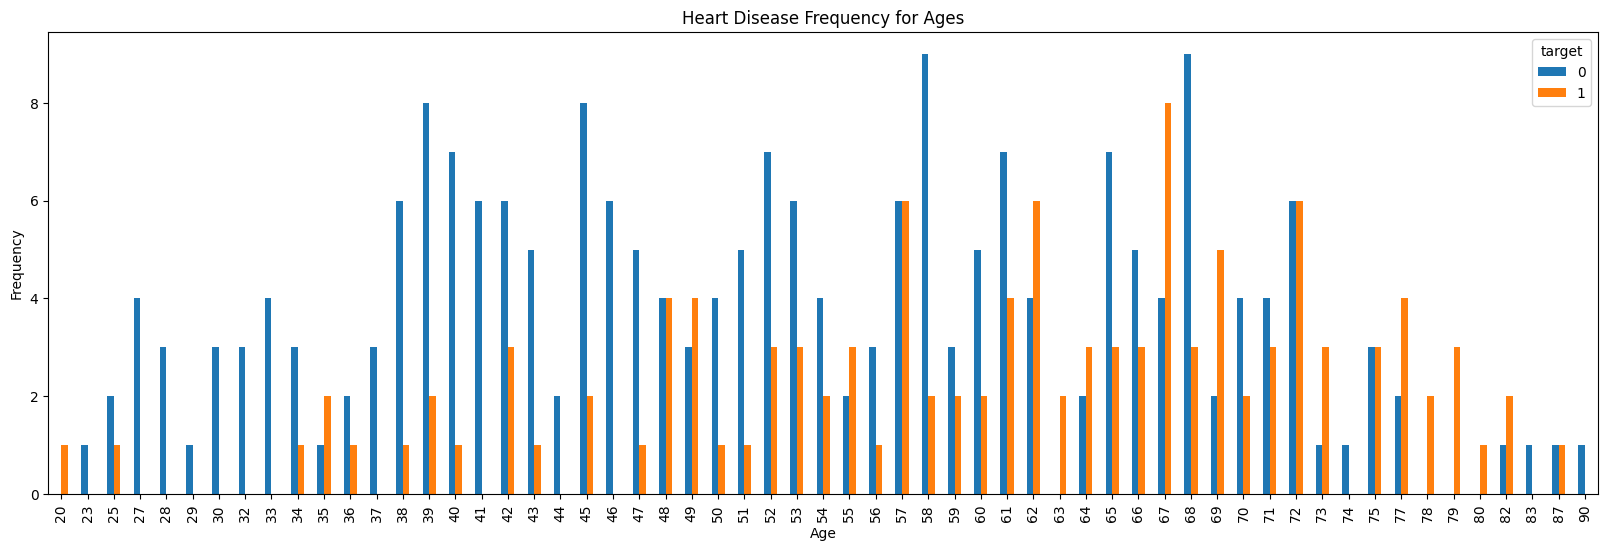

In [11]:
# Heart disease frequency for Ages
pd.crosstab(data.age, data.target).plot(kind="bar", figsize=(20, 6))
plt.title("Heart Disease Frequency for Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

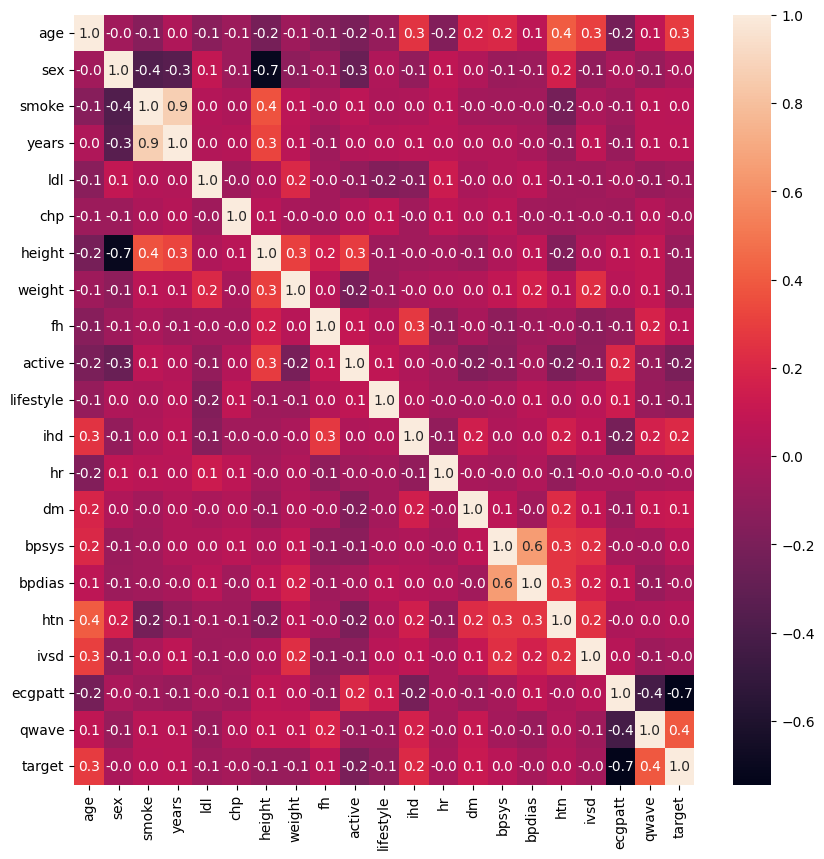

In [12]:
# Histogram equalization of the dataset
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt='.1f')
plt.show()

In [13]:
# Data splitting into traning and testing set
x = np.array(data.drop(['target'], axis=1))
y = np.array(data['target'])

In [14]:
x[0]

array([ 65.,   0.,   0.,   0.,  69.,   4., 168., 111.,   1.,   0.,   1.,
         1.,  98.,   1., 120.,  80.,   1.,   0.,   4.,   0.])

In [15]:
# binarizing the data
mean = x.mean(axis=0)
x-=mean
std=x.std(axis=0)
x/=std

In [16]:
x.shape

(333, 20)

In [17]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, random_state=14, test_size = 0.2)

In [18]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=None)
y_test = to_categorical(y_test, num_classes=None)
print(y_train.shape)
print(y_test.shape)

(266, 2)
(67, 2)


In [19]:
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=15)

In [20]:
# Building the model using Neural Networks
from keras.layers import Dropout
model = Sequential()
model.add(Dense(64, input_dim=20, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(32, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(16, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(8, activation='softmax'))
model.add(Dropout(0.20))
model.add(Dense(2, activation='sigmoid'))

adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 1

In [21]:
history = model.fit(x_test, y_test, validation_data=(x_test, y_test),epochs=50, batch_size=10, callbacks=[es])
acc = model.evaluate(x_test, y_test)
print(f"Loss: {round(acc[0]*100,2)}%\n")
print(f"Accuracy: {round(acc[0]*100,2)}%\n")

Epoch 1/50



7/7 [==============================] - 2s 65ms/step - loss: 0.7123 - accuracy: 0.4627 - val_loss: 0.7091 - val_accuracy: 0.3433
Epoch 2/50
7/7 [==============================] - 0s 12ms/step - loss: 0.7026 - accuracy: 0.4478 - val_loss: 0.7004 - val_accuracy: 0.7015
Epoch 3/50
7/7 [==============================] - 0s 16ms/step - loss: 0.7025 - accuracy: 0.5970 - val_loss: 0.6926 - val_accuracy: 0.6567
Epoch 4/50
7/7 [==============================] - 0s 15ms/step - loss: 0.6867 - accuracy: 0.5821 - val_loss: 0.6842 - val_accuracy: 0.6567
Epoch 5/50
7/7 [==============================] - 0s 13ms/step - loss: 0.6903 - accuracy: 0.5821 - val_loss: 0.6742 - val_accuracy: 0.6567
Epoch 6/50
7/7 [==============================] - 0s 14ms/step - loss: 0.6788 - accuracy: 0.6269 - val_loss: 0.6601 - val_accuracy: 0.6567
Epoch 7/50
7/7 [==============================] - 0s 14ms/step - loss: 0.6685 - accuracy: 0.5970 - val_loss: 0.6393 - val_accuracy: 0.6567
Epoch 8/50
7/7 [======================